# Loading Dataset

In [2]:
import pandas as pd

df = pd.read_csv("/content/Mall_Customers.csv")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data = pd.get_dummies(df,drop_first=True,dtype=int)
data = data.drop('CustomerID',axis=1)
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [6]:
data

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,0
197,32,126,74,1
198,32,137,18,1


# Exploratory data analysis

In [7]:
df['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


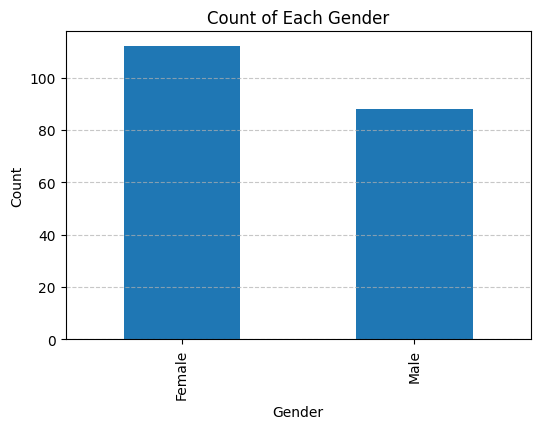

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Gender'].value_counts().plot(kind='bar', figsize=(6,4))
plt.title('Count of Each Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-1902145590.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=feature,fill=True, common_norm=False, palette="Set1")


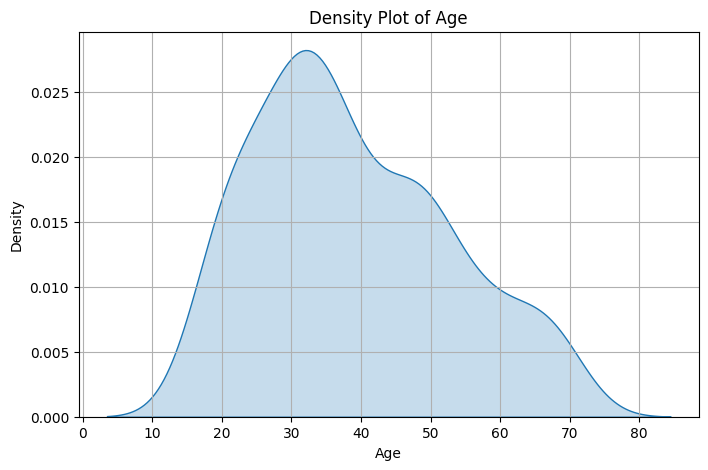

/tmp/ipython-input-1902145590.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=feature,fill=True, common_norm=False, palette="Set1")


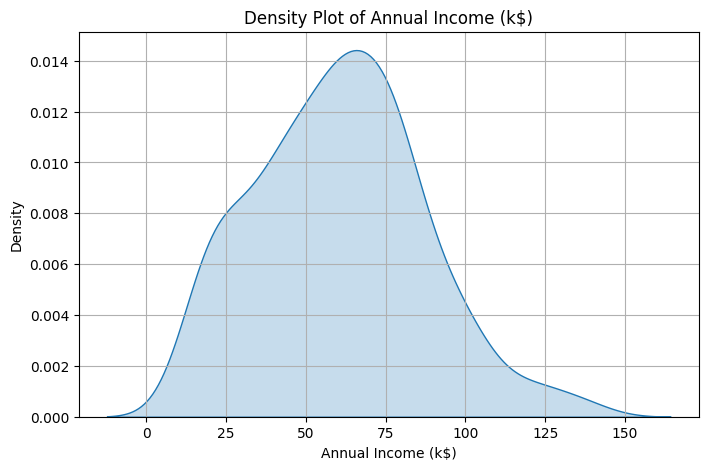

/tmp/ipython-input-1902145590.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=df, x=feature,fill=True, common_norm=False, palette="Set1")


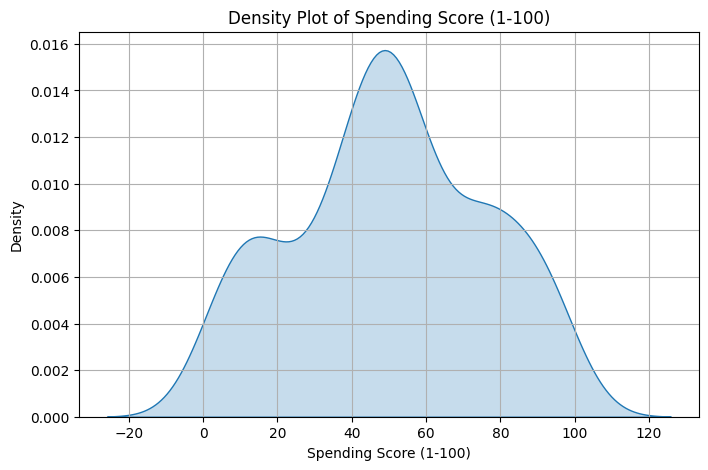

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

columns_for_plot = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for feature in columns_for_plot:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=feature,fill=True, common_norm=False, palette="Set1")
    plt.title(f"Density Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.grid(True)
    plt.show()

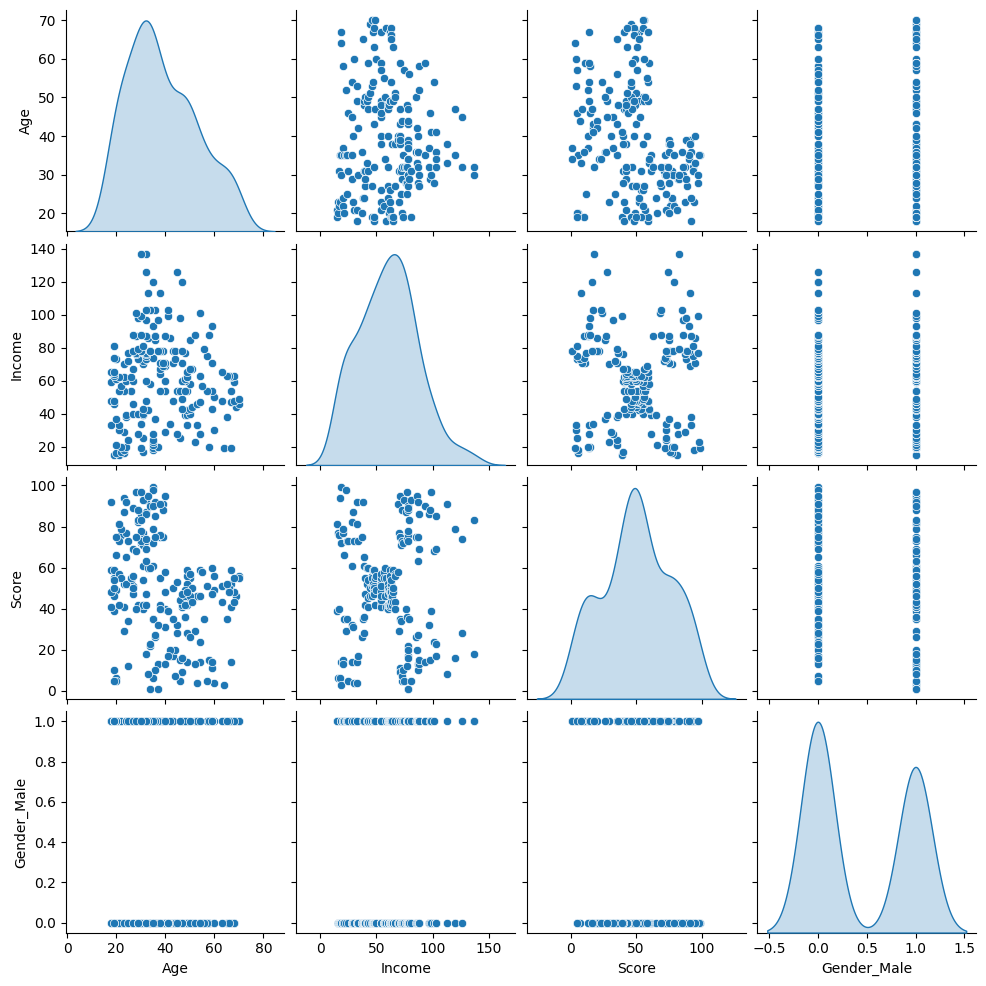

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, diag_kind='kde')
plt.show()

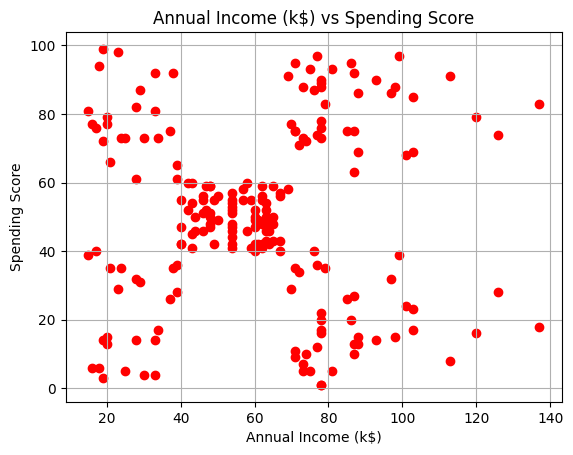

In [11]:
plt.scatter(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], c="red")
plt.title('Annual Income (k$) vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

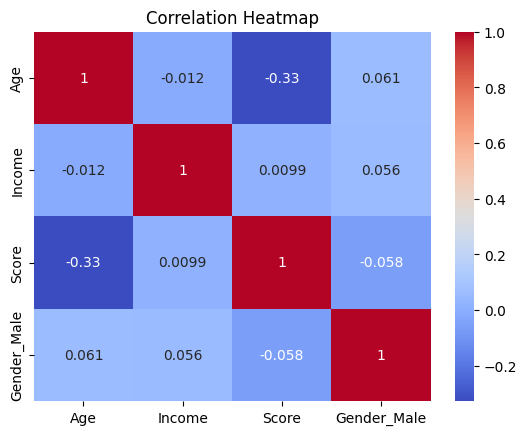

In [12]:
cm = data.corr()

sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Clustering KMeans

In [13]:
data.head()

,Age,Income,Score,Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [14]:
clustering_df = data.drop(["Gender_Male","Age"],axis=1)
clustering_df.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_df)
scaled_df = pd.DataFrame(scaled_data, columns=clustering_df.columns, index=clustering_df.index)

scaled_df.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


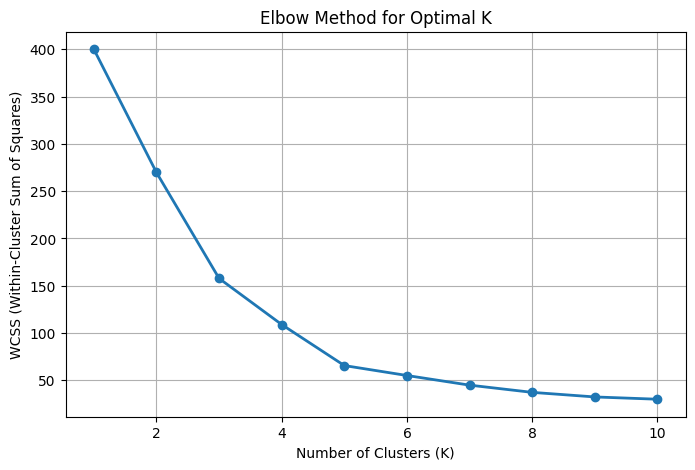

In [16]:
from sklearn.cluster import KMeans

wcss=[]

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', linewidth=2)
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans.fit_predict(scaled_df)

In [19]:
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [20]:
data = pd.concat([data, pd.Series(labels, name='Cluster')], axis=1)

In [21]:
data

,Age,Income,Score,Gender_Male,Cluster
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,3
197,32,126,74,1,1
198,32,137,18,1,3


In [25]:
scaled_centroids = kmeans.cluster_centers_

centroids = scaler.inverse_transform(scaled_centroids)

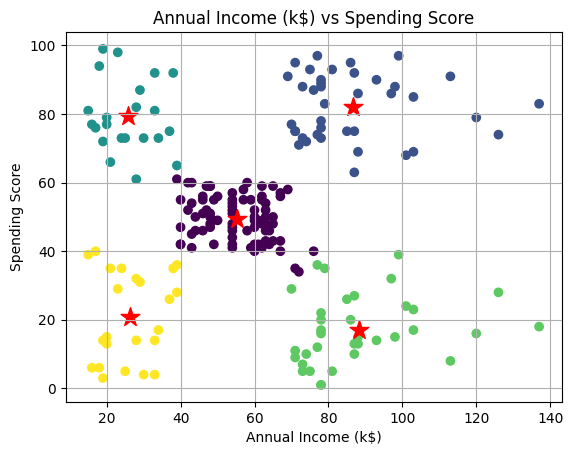

In [40]:
plt.scatter(x=data['Income'], y=data['Score'], c=data['Cluster'])
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], marker='*', color="red", s=200)
plt.title('Annual Income (k$) vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

In [44]:
data.groupby("Cluster").mean()

,Age,Income,Score,Gender_Male
Cluster,,,,
0,42.716049,55.296296,49.518519,0.407407
1,32.692308,86.538462,82.128205,0.461538
2,25.272727,25.727273,79.363636,0.409091
3,41.114286,88.200000,17.114286,0.542857
4,45.217391,26.304348,20.913043,0.391304


Gender_Male  Female  Male
Cluster                  
0                48    33
1                21    18
2                13     9
3                16    19
4                14     9


<Figure size 800x500 with 0 Axes>

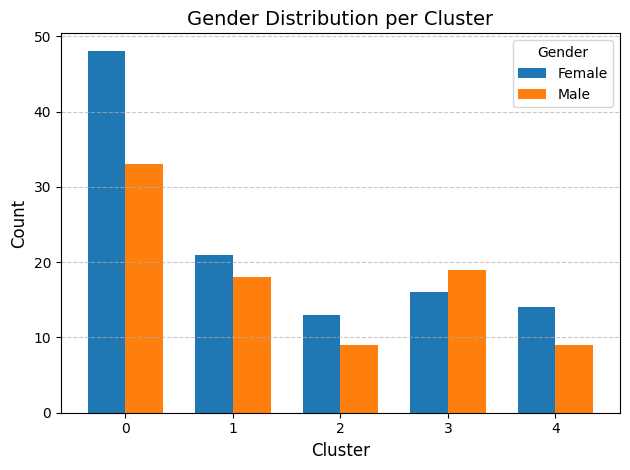

In [50]:
gender_dist = data.groupby("Cluster")["Gender_Male"].value_counts().unstack().fillna(0)
gender_dist.rename(columns={0: "Female", 1: "Male"}, inplace=True)

print(gender_dist)

plt.figure(figsize=(8,5))
gender_dist.plot(kind="bar", width=0.7)
plt.title("Gender Distribution per Cluster", fontsize=14)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Gender")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()